In [1]:
import os
from PIL import Image
import glob

In [2]:
Image.MAX_IMAGE_PIXELS = None

In [3]:
def crop(infile,height,width):
    im = Image.open(infile)
    imgwidth, imgheight = im.size
    for i in range(imgheight//height):
        for j in range(imgwidth//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield im.crop(box)

In [ ]:
# img_dir_train = sorted(glob.glob("D:/courses/MRP/dataset/train_val/trainval/train/image/*"))
# mask_dir_train = sorted(glob.glob("D:/courses/MRP/dataset/train_val/trainval/train/label/*"))

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [8]:
dir_images = 'D:\courses/MRP/dataset/test/image/'
dir_masks = 'D:/courses/MRP/dataset/test/label/'

In [9]:
image_list = getListOfFiles(dir_images)
mask_list = getListOfFiles(dir_masks)

In [13]:
mask_list

['D:/courses/MRP/dataset/test/label/christchurch_1011.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_1037.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_1051.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_109.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_110.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_111.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_144.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_145.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_15.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_162.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_19.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_223.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_227.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_228.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_236.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_240.tif',
 'D:/courses/MRP/dataset/test/label/christchurch_257.ti

In [10]:
len(image_list)

94

In [12]:
for im in image_list:
    #infile="C:/Users/troyl/Desktop/courses/MRP/image_prep/data/train/image/christchurch_173.tif"
    infile=im
    base = os.path.basename(im)
    base = base[:-4]
    print("Splitting: ", im)
    print(base)
    height=768
    width=768
    start_num=1
    for k,piece in enumerate(crop(infile,height,width),start_num):
        img=Image.new('RGB', (height,width))
        img.paste(piece)
        path=os.path.join("D:/courses/MRP/dataset/final/images/test/", base+"_%s.png" % k)
        #path=os.path.join("C:/Users/troyl/Desktop/courses/MRP/image_prep/data/output/train/imgs/", base+"_%s.jpg" % k)
        #path=os.path.join("C:/Users/troyl/Desktop/courses/MRP/image_prep/data/output/train/masks/", base+"_%s.gif" % k)
        img.save(path)
        
    print("Done")
    print("\n")
    

Splitting:  D:/courses/MRP/dataset/test/image/christchurch_1011.tif
christchurch_1011
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_1037.tif
christchurch_1037
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_1051.tif
christchurch_1051
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_109.tif
christchurch_109
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_110.tif
christchurch_110
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_111.tif
christchurch_111
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_144.tif
christchurch_144
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_145.tif
christchurch_145
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_15.tif
christchurch_15
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_162.tif
christchurch_162
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_19.tif
christchurch_19
Done

Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_962.tif
christchurch_962
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_965.tif
christchurch_965
Done


Splitting:  D:/courses/MRP/dataset/test/image/christchurch_996.tif
christchurch_996
Done




In [14]:
for im in mask_list:
    
    infile=im
    base = os.path.basename(infile)
    base = base[:-4]
    print("Splitting: ", im)
    print(base)
    height=768
    width=768
    start_num=1
    for k,piece in enumerate(crop(infile,height,width),start_num):
        img=Image.new('L', (height,width))
        img.paste(piece)
        #img.convert('L')
        path=os.path.join("D:/courses/MRP/dataset/final/annotations/test/", base+"_%s.png" % k)
        #path=os.path.join("C:/Users/troyl/Desktop/courses/MRP/image_prep/data/output/train/imgs/", base+"_%s.jpg" % k)
        #path=os.path.join("C:/Users/troyl/Desktop/courses/MRP/image_prep/data/output/train/masks/", base+"_%s.gif" % k)
        
        img.save(path)
        
    print("Done")
    print("\n")
    

Splitting:  D:/courses/MRP/dataset/test/label/christchurch_1011.tif
christchurch_1011
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_1037.tif
christchurch_1037
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_1051.tif
christchurch_1051
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_109.tif
christchurch_109
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_110.tif
christchurch_110
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_111.tif
christchurch_111
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_144.tif
christchurch_144
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_145.tif
christchurch_145
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_15.tif
christchurch_15
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_162.tif
christchurch_162
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_19.tif
christchurch_19
Done

Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_962.tif
christchurch_962
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_965.tif
christchurch_965
Done


Splitting:  D:/courses/MRP/dataset/test/label/christchurch_996.tif
christchurch_996
Done




In [59]:
map_ = Image.open("D:/courses/MRP/dataset/split/train/labels/christchurch_1000_14.png")

In [60]:
classes_map = np.unique(np.array(map_)).tolist()
classes_map

[0, 1]

In [61]:
import numpy as np

ground_truth = np.array(map_)

In [62]:
print(ground_truth)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
import matplotlib.pyplot as plt

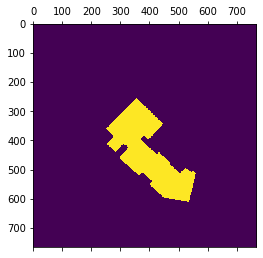

In [64]:
plt.matshow(map_)
plt.show()

In [28]:
np.unique(ground_truth)

array([False])

In [ ]:
img_dir_val = sorted(glob.glob("D:/courses/MRP/dataset/train_val/trainval/val/image/*"))
mask_dir_val = sorted(glob.glob("D:/courses/MRP/dataset/train_val/trainval/val/label/*"))